In [25]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('./bot.db')  
query = "SELECT * FROM pairs;"
pairs = pd.read_sql_query(query, conn)
conn.close()
display(pairs.head())


,symbol,exchange,gap,volume,asks,bids,nbTransactionGap,volumeTransactionGap,ratio,volatility,nbWave,averageAmplitude
0,rnt_usdt,lbank,0.022479,0.000000,0.000000,0.000000,0,0.000000,8,4.910262,41,21.445561
1,hnb_usdt,lbank,0.070352,1.775799,1.775799,0.000000,0,0.000000,7,2.901021,30,20.276275
2,bty_usdt,lbank,0.035580,1994.937961,1513.999531,480.938430,2,1.844490,7,3.048571,50,7.606259
3,lbk_usdt,lbank,0.015860,27287.345351,15552.388486,11734.956865,4,0.439204,8,2.733055,69,5.849314
4,ain_usdt,lbank,0.018112,31.087990,12.837547,18.250443,19,0.250640,6,1.425218,11,2.486449


In [26]:
pairs.set_index('symbol', inplace=True)
pairs.drop(columns=['exchange','asks','bids','ratio'], inplace=True)

pairs = pairs[pairs['volume'] > 0]
display(pairs.head())


,gap,volume,nbTransactionGap,volumeTransactionGap,volatility,nbWave,averageAmplitude
symbol,,,,,,,
hnb_usdt,0.070352,1.775799,0,0.000000,2.901021,30,20.276275
bty_usdt,0.035580,1994.937961,2,1.844490,3.048571,50,7.606259
lbk_usdt,0.015860,27287.345351,4,0.439204,2.733055,69,5.849314
ain_usdt,0.018112,31.087990,19,0.250640,1.425218,11,2.486449
lit_usdt,0.010820,1473.019840,2,0.357548,2.645486,36,6.432260


In [27]:
from sklearn.preprocessing import StandardScaler

numeric_cols = pairs.select_dtypes(include=['float64', 'int64']).columns
data = pairs[numeric_cols]

index = pairs.index

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

scaled_pairs = pd.DataFrame(data_scaled, columns=numeric_cols, index=index)

scaled_pairs.head()


,gap,volume,nbTransactionGap,volumeTransactionGap,volatility,nbWave,averageAmplitude
symbol,,,,,,,
hnb_usdt,-0.155594,-0.252100,-0.355000,-0.274667,-0.578506,-0.677564,-0.130294
bty_usdt,-0.391999,-0.223108,-0.329724,-0.206430,-0.557877,-0.078854,-0.272951
lbk_usdt,-0.526065,0.144789,-0.304447,-0.258419,-0.601990,0.489919,-0.292733
ain_usdt,-0.510756,-0.251673,-0.114874,-0.265394,-0.784841,-1.246338,-0.330597
lit_usdt,-0.560335,-0.230699,-0.329724,-0.261439,-0.614233,-0.497951,-0.286170


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)  
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [29]:
silhouette_scores

[0.7005791050955193,
 0.712112108812595,
 0.47157022410932825,
 0.473807810381449,
 0.42830674767183036,
 0.43258937695806216,
 0.44496926214586985,
 0.31667185652836155,
 0.3165125942050734]

In [30]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)



In [31]:
scaled_pairs['Cluster'] = cluster_labels
pairs['Cluster'] = cluster_labels


In [33]:
scaled_pairs.to_csv('./clustered_pairs.csv')

In [34]:
display(pairs[scaled_pairs.Cluster==1])

,gap,volume,nbTransactionGap,volumeTransactionGap,volatility,nbWave,averageAmplitude,Cluster
symbol,,,,,,,,
omochi_usdt,0.023186,29755.253697,492,27.447589,8.422024,30,26.727954,1
remilia_usdt,0.016554,418092.256600,487,94.671247,4.099732,68,9.201561,1
kabosu2_usdt,0.019550,102373.852304,475,58.347635,3.528524,49,8.575045,1
gnon_usdt,0.016850,393178.936556,209,57.870824,7.978003,51,20.960999,1
betch_usdt,0.027160,756809.395585,10,32.507909,5.338958,31,23.664243,1
eagle_usdt,0.023195,261214.728452,398,321.052662,10.761359,50,29.224856,1
jam_usdt,0.023934,74649.563430,361,38.269120,13.645358,55,37.496584,1
punk3493_usdt,0.028776,109328.017589,483,112.741055,18.674310,29,110.159200,1
quant_usdt,0.023495,217169.103028,344,199.987207,16.330830,41,45.980485,1


In [35]:
display(pairs[scaled_pairs.Cluster==2])

,gap,volume,nbTransactionGap,volumeTransactionGap,volatility,nbWave,averageAmplitude,Cluster
symbol,,,,,,,,
fei_usdt,0.872397,52.414053,0,0.000000,22.028826,6,865.776721,2
msp_usdt,0.132701,41673.709717,34,19.920897,34.258416,51,593.678814,2
xent_usdt,0.237500,387.778028,4,3.740652,22.383045,20,897.187500,2


In [36]:
display(pairs[scaled_pairs.Cluster==3])

,gap,volume,nbTransactionGap,volumeTransactionGap,volatility,nbWave,averageAmplitude,Cluster
symbol,,,,,,,,
lbs_usdt,0.344465,35.998488,2,1.529422,5.489242,32,43.158401,3
coon_usdt,0.277896,644.285503,65,10.730904,25.405574,74,59.415539,3
alita_usdt,0.494253,1.168175,0,0.000000,0.067507,2,13.636364,3
plank_usdt,0.873871,8.722799,0,0.000000,0.000000,0,0.000000,3
mvp_usdt,0.648275,22.760503,0,0.000000,5.153878,13,155.483915,3
imaro_usdt,0.310365,0.466923,0,0.000000,4.847836,69,12.207975,3
fox2_usdt,0.182536,309.093448,3,4.182299,19.811974,138,27.176862,3
rom_usdt,0.574112,269.220462,0,0.000000,2.332350,3,101.173481,3
ldk_usdt,0.466667,21.914827,213,0.263637,11.760923,146,14.373289,3


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_pairs)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'], index=scaled_pairs.index)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.31096003 0.25813447]


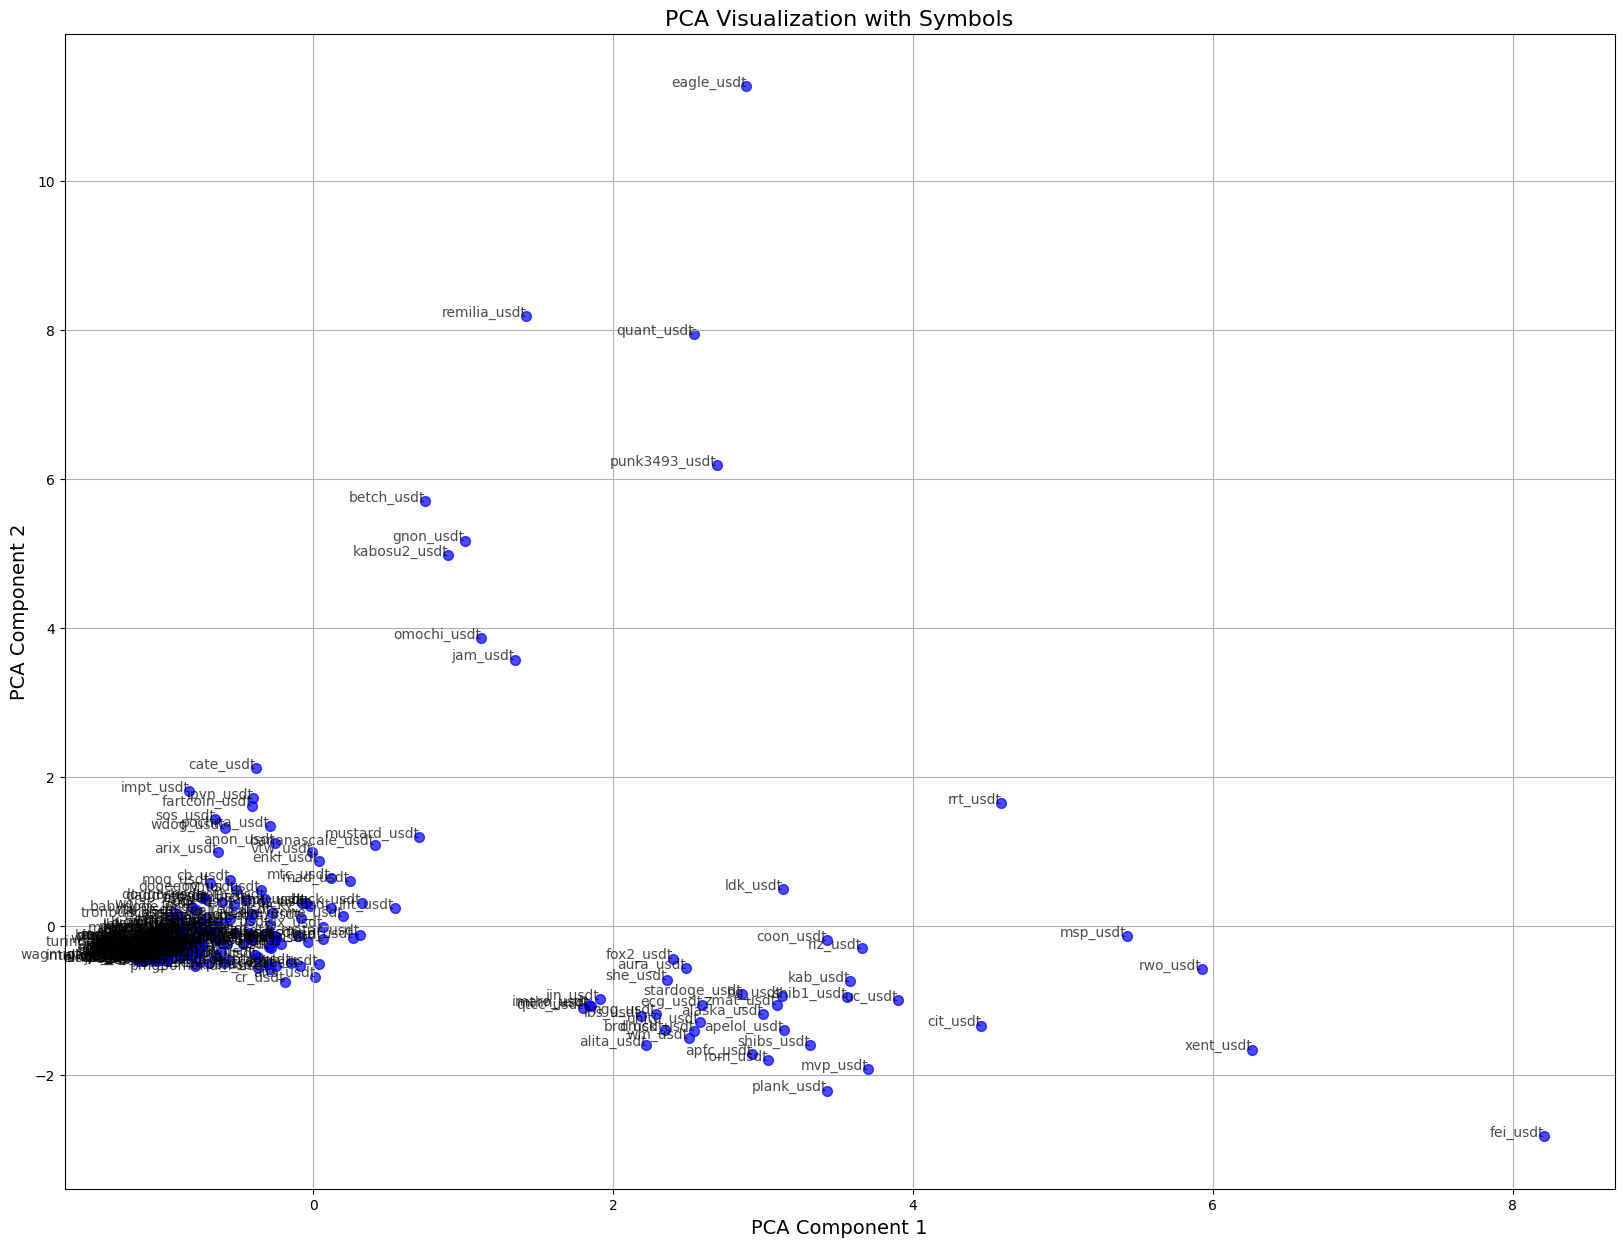

In [38]:
import matplotlib.pyplot as plt

# Create a large scatter plot
plt.figure(figsize=(20, 15))  # Set a large figure size for clarity
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c='blue', s=50, alpha=0.7)

# Add text labels for each point (using the symbol as the index)
for symbol, (x, y) in pca_df.iterrows():
    plt.text(x, y, symbol, fontsize=10, ha='right', alpha=0.7)

# Add titles and axis labels
plt.title('PCA Visualization with Symbols', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)

plt.grid(True)
plt.show()
